In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 300
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
감염병 = pd.read_csv(path + '변수중요도_감염병.csv',encoding='cp949')

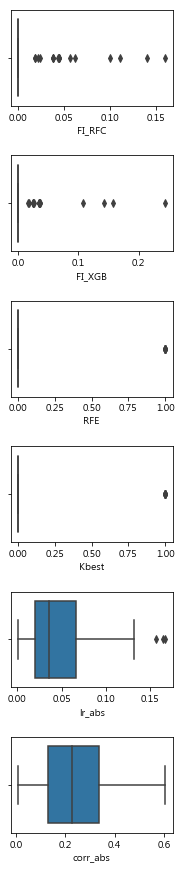

In [20]:
lst = 감염병.columns[3:].tolist()
fig,ax = plt.subplots(nrows=len(lst),figsize=(3,len(lst)*2))
fig.tight_layout(h_pad=3)
for n,i in enumerate(lst):
    sns.boxplot(x=f'{i}', data=감염병, ax = ax[n])

In [69]:
#상관관계 0.4넘는애들 중 하나가 트루로 선택되거나 FI가 높은
cond = (감염병.lr_abs>0.15)|(감염병.FI_XGB>0.1)|(감염병.FI_RFC>0.05)
cond2= ((감염병.Kbest==True)|(감염병.RFE==True))
cond3= (감염병.corr_abs>0.4)
감염병.loc[cond3&(cond2|cond)]

,feature,lr,corr,FI_RFC,FI_XGB,RFE,Kbest,lr_abs,corr_abs
6,감염병 사망자수,0.030242,0.571542,0.000000,0.00000,False,True,0.030242,0.571542
11,경찰관서수,0.079907,0.483468,0.000000,0.00000,False,True,0.079907,0.483468
12,고령인구수,0.041936,0.501588,0.159890,0.00000,False,False,0.041936,0.501588
28,기초수급자수(65세이상),0.110946,0.605549,0.000000,0.02458,False,True,0.110946,0.605549
31,다중이용업소수,-0.113835,-0.467263,0.000000,0.00000,False,True,0.113835,0.467263
39,독거노인수,0.060387,0.484528,0.000000,0.00000,False,True,0.060387,0.484528
80,어린이 아토피,-0.166831,-0.457180,0.000000,0.00000,False,False,0.166831,0.457180
83,외국인수,-0.087267,-0.456792,0.000000,0.00000,False,True,0.087267,0.456792
101,이혼건수,-0.120933,-0.592173,0.140476,0.00000,False,False,0.120933,0.592173
129,주민등록인구(60세이상),0.068756,0.535753,0.000000,0.00000,False,True,0.068756,0.535753
